In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

data preprocessing


In [6]:
training_set= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive (12)/train',
                                                          labels= 'inferred' ,#generated from directory structure
                                                          label_mode='categorical',
                                                          class_names= None,
                                                          color_mode= 'rgb',
                                                          batch_size= 32,
                                                          image_size= (64, 64),
                                                          shuffle= True,
                                                          seed=None,
                                                          validation_split=None,
                                                          subset= None,
                                                           interpolation= 'bilinear', #used to resize the image
                                                          follow_links=False,
                                                          crop_to_aspect_ratio= False)

Found 3115 files belonging to 36 classes.


validation set image processing

In [7]:
validation_set= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/archive (12)/validation',
                                                          labels= 'inferred' ,#generated from directory structure
                                                          label_mode='categorical',
                                                          class_names= None,
                                                          color_mode= 'rgb',
                                                          batch_size= 32,
                                                          image_size= (64, 64),
                                                          shuffle= True,
                                                          seed=None,
                                                          validation_split=None,
                                                          subset= None,
                                                           interpolation= 'bilinear', #used to resize the image
                                                          follow_links=False,
                                                          crop_to_aspect_ratio= False)

Found 351 files belonging to 36 classes.


building model

In [9]:
cnn= tf.keras.models.Sequential()

building convolution layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu', input_shape= [64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))

making it 2 times so as to focus on important features and thus reducing the size

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= 3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides= 2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units= 128, activation='relu')) #to make neurons 128

In [17]:
#output layer
cnn.add(tf.keras.layers.Dense(units= 36, activation= 'softmax')) #output neuron is 36 as categories is also 36

compiling and training

In [18]:
cnn.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy',metrics= ['accuracy'] )

In [28]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [19]:
training_history = cnn.fit(x= training_set, validation_data= validation_set, epochs= 30)

Epoch 1/30
98/98 [==============================] - 555s 5s/step - loss: 12.4598 - accuracy: 0.0343 - val_loss: 3.5122 - val_accuracy: 0.0598
Epoch 2/30
98/98 [==============================] - 107s 1s/step - loss: 4.5108 - accuracy: 0.0533 - val_loss: 3.3991 - val_accuracy: 0.1368
Epoch 3/30
98/98 [==============================] - 112s 1s/step - loss: 4.2378 - accuracy: 0.0973 - val_loss: 3.1605 - val_accuracy: 0.2536
Epoch 4/30
98/98 [==============================] - 107s 1s/step - loss: 4.4307 - accuracy: 0.1400 - val_loss: 2.8523 - val_accuracy: 0.3333
Epoch 5/30
98/98 [==============================] - 117s 1s/step - loss: 4.7146 - accuracy: 0.1814 - val_loss: 3.0437 - val_accuracy: 0.2450
Epoch 6/30
98/98 [==============================] - 105s 1s/step - loss: 3.0632 - accuracy: 0.2536 - val_loss: 2.5635 - val_accuracy: 0.3818
Epoch 7/30
98/98 [==============================] - 107s 1s/step - loss: 3.0407 - accuracy: 0.3101 - val_loss: 2.9502 - val_accuracy: 0.3732
Epoch 8/30
9

In [20]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#recording history
import json
with open('training_hist.json', 'w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


calculating accuracy of validation set

In [23]:
print("validation set accuracy: {} %", training_history.history['val_accuracy'][-1]*100)

validation set accuracy: {} % 91.73789024353027


**accuracy** **visualization**

training visualization

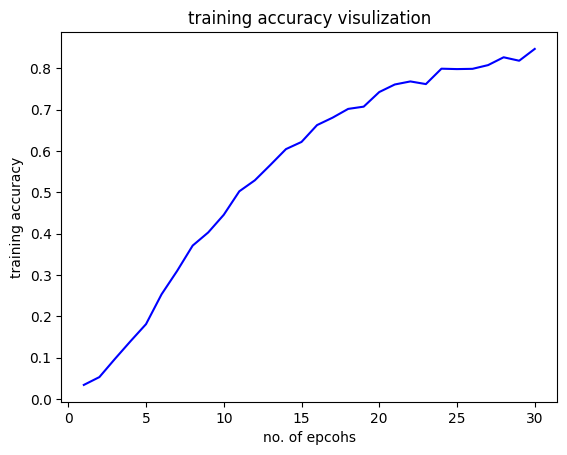

In [25]:
epochs = [i for i in range (1, 31)]
plt.plot(epochs, training_history.history['accuracy'], color='blue')
plt.xlabel('no. of epcohs')
plt.ylabel('training accuracy')
plt.title('training accuracy visulization')
plt.show()

validation accuracy

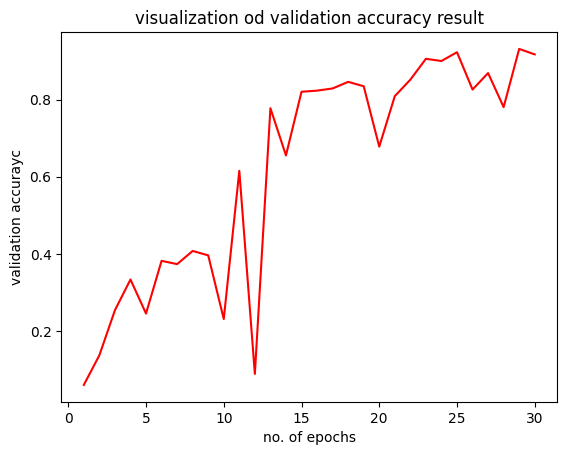

In [27]:
plt.plot(epochs, training_history.history['val_accuracy'], color='red')
plt.xlabel('no. of epochs')
plt.ylabel('validation accurayc')
plt.title('visualization od validation accuracy result')
plt.show()